# Implementation du score classiffier et du dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score
from sklearn.svm import SVC

In [2]:
def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        recall/=3
    return confusion_mat, recall

In [4]:
df = pd.read_csv("nba_logreg.csv")

In [5]:
df.head(6)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0


In [5]:
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels

In [6]:
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
print(df_vals.shape)

(1340, 19)


## Le dataset assez petit
donc théoriquement il faut utiliser un classificateur avec un biais élevé (par exemple, Naive Bayes).Un classificateur à biais plus élevé aura une variance plus faible, ce qui est bien en raison de la petite quantité de données.

In [7]:
for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0

In [8]:
#Checking for Class imbalance
print((df['TARGET_5Yrs'] == 1).sum(), (df['TARGET_5Yrs'] == 0).sum())

831 509


## Vérifier le déséquilibre de classe
On vérifie si une classe domine et qu'il y a très peu d'instances de l'autre classe.Le cas écheant signifie que notre algorithme ML est exposé à très moins de cas de formation. mais ceux n'est pas le cas dans notre dataset car la différence entre les nombres de cas dans chauque class est acceptable

In [9]:
# Mise à l'échelle standard des données
X = MinMaxScaler().fit_transform(df_vals)

# On commence par une simple regression linéare
Cela va nous permettre de mieux comprendre notre data et la corrélation entre nos features. Dans notre cas, vu les valeurs des coefs et des d'erreurs notre data est trés defficile à etre séparer linearement 

Coefficients: 
 [0.85714086]
Mean squared error: 0.27


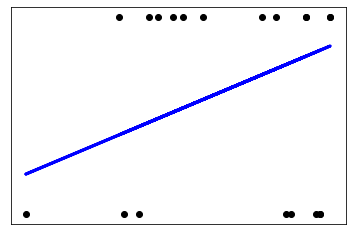

Coefficients: 
 [0.74039254]
Mean squared error: 0.23


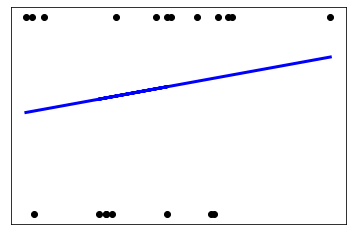

Coefficients: 
 [0.98344129]
Mean squared error: 0.24


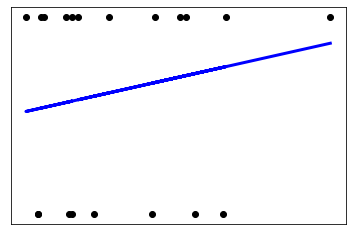

Coefficients: 
 [0.92641661]
Mean squared error: 0.24


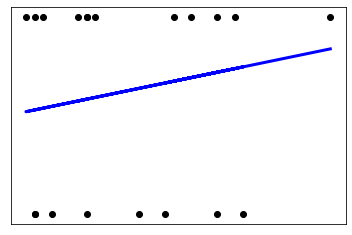

Coefficients: 
 [0.77334367]
Mean squared error: 0.24


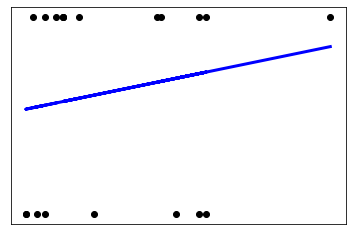

Coefficients: 
 [1.06355944]
Mean squared error: 0.26


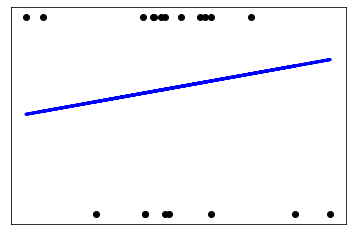

Coefficients: 
 [0.09322483]
Mean squared error: 0.24


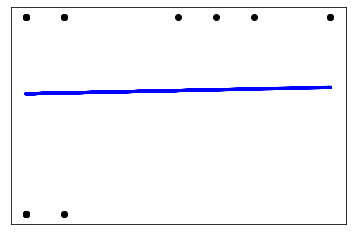

Coefficients: 
 [0.04125534]
Mean squared error: 0.24


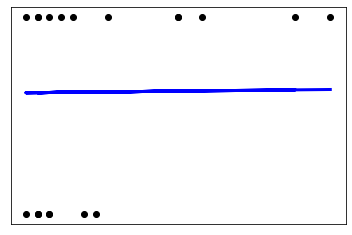

Coefficients: 
 [-0.00265618]
Mean squared error: 0.24


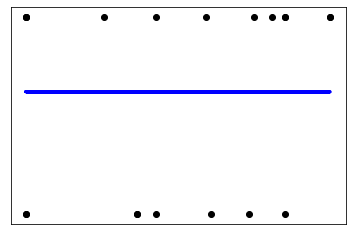

Coefficients: 
 [1.12330788]
Mean squared error: 0.25


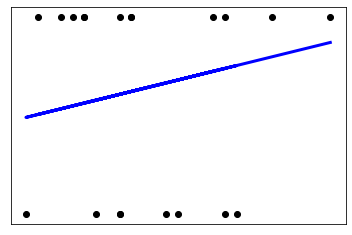

Coefficients: 
 [1.11003165]
Mean squared error: 0.25


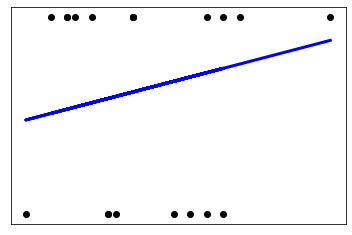

Coefficients: 
 [0.40629816]
Mean squared error: 0.25


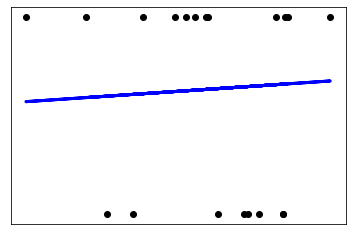

Coefficients: 
 [0.98602284]
Mean squared error: 0.27


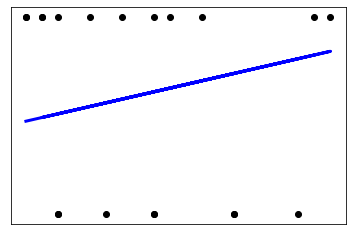

Coefficients: 
 [0.97776921]
Mean squared error: 0.24


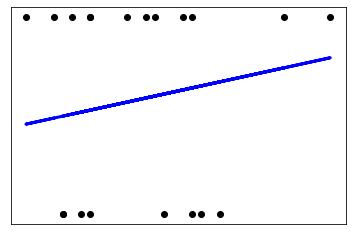

Coefficients: 
 [0.98677797]
Mean squared error: 0.25


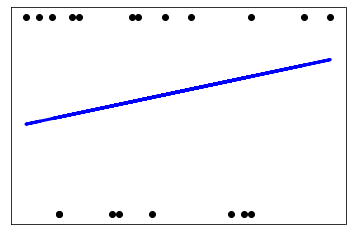

Coefficients: 
 [0.60670885]
Mean squared error: 0.22


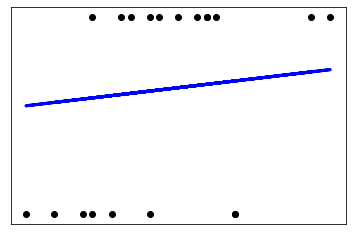

Coefficients: 
 [0.67666208]
Mean squared error: 0.24


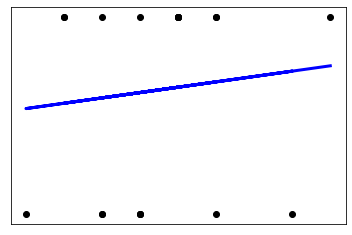

Coefficients: 
 [0.94635751]
Mean squared error: 0.24


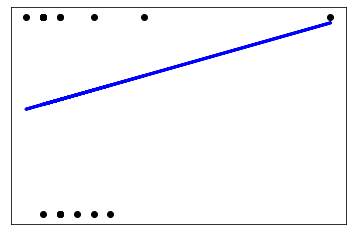

Coefficients: 
 [0.79234968]
Mean squared error: 0.22


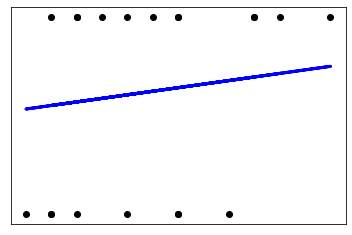

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset

for i in range(0,19):
  diabetes_X, diabetes_y = X, labels;

  # Use only one feature
  diabetes_X = diabetes_X[:, i].reshape(-1,1)

  # Split the data into training/testing sets
  diabetes_X_train = diabetes_X[:-20]
  diabetes_X_test = diabetes_X[-20:]

  # Split the targets into training/testing sets
  diabetes_y_train = diabetes_y[:-20]
  diabetes_y_test = diabetes_y[-20:]

  # Create linear regression object
  regr = linear_model.LinearRegression()

  # Train the model using the training sets
  regr.fit(diabetes_X_train, diabetes_y_train)

  # Make predictions using the testing set
  diabetes_y_pred = regr.predict(diabetes_X_test)

  # The coefficients
  print("Coefficients: \n", regr.coef_)
  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

  # Plot outputs
  plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
  plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

  plt.xticks(())
  plt.yticks(())

  plt.show()

#  Le Test des classificateurs de base en premier


In [10]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
score_classifier(X,lr_clf,labels)

(array([[260., 249.],
        [137., 694.]]), 0.4033097533335308)

0.38598115398961896

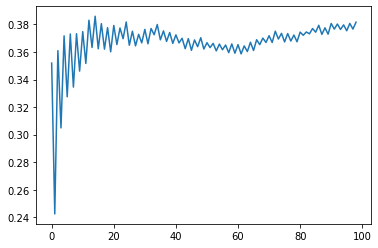

In [11]:
#KNN classifier 
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1,100):
  neigh_clf  = KNeighborsClassifier(n_neighbors=i)
  scores.append(score_classifier(X,neigh_clf,labels)[1])
plt.plot(scores)
max(scores)

In [14]:
#Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
mb_clf= MultinomialNB()
score_classifier(X,mb_clf,labels)

(array([[  0., 509.],
        [  0., 831.]]), 0.48148148148148145)

Pour le Moment il semble que le classfieur de bernoulli est le plus préfomant, comme était prévu, mais si on regarde la matrice de confusion on trouve que l'algorithme n'a fait que prédire des la même class pour toutes les données donc il n'est pas vraiment pérformant 



####  Test de  SGD Car vue la taille des données il peut êrtre très pérformant 


In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
rep, rec  = score_classifier(X,sgd_clf,labels)
print('rec', rec)
print(rep)

rec 0.4278174654573063
[[178. 331.]
 [ 88. 743.]]


Il est pas mal aussi mais  on peut par las suite l'améloirer en utilisant GridSearchCV

In [111]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}


grid = GridSearchCV(sgd_clf, param_grid=params, cv=20, scoring='recall')


grid.fit(df_vals, labels)

print(grid.best_params_) 

{'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='modified_huber', 
                        penalty='elasticnet',
                        alpha=0.001,
                        l1_ratio=0.15,
                        fit_intercept=False,
                        max_iter=100000,
                        tol=1e-3,
                        shuffle=True,
                        verbose=0, epsilon=0.1,
                        n_jobs=None,
                        random_state=None,
                        learning_rate='optimal',
                        eta0=0.0, power_t=0.5,
                        early_stopping=False,
                        validation_fraction=0.1,
                        n_iter_no_change=5,
                        class_weight=None,
                        warm_start=False,
                        average=False)
rep, re = score_classifier(X,sgd_clf,labels)

print('rec', rec)
print(rep)


rec 0.4278174654573063
[[331. 178.]
 [283. 548.]]


### c'est le plus grand score qu'on a jusqu'à ce maintenant 

Dans cette étape il sera plus juducieux d'aller vers des models un plus complex tell que les svm et les decision trees

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=150,
                                criterion='gini',
                                max_depth=10,
                                min_samples_leaf=4,
                                max_features='auto',
                                max_leaf_nodes=None, 
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=False,
                                n_jobs=None, 
                                random_state=None, 
                                warm_start=False,
                                class_weight=None)
score_classifier(X,rf_clf,labels)

(array([[268., 241.],
        [164., 667.]]), 0.39698370707066144)

Le SVC est pévu d'etre plus pérformant avec une grande valeur de gamma

In [15]:
from sklearn.svm import SVC
svc_clf = SVC(C=1.0, kernel='rbf', gamma=100, coef0=1.0, tol=0.001, cache_size=10, max_iter=- 1, decision_function_shape='ovo', random_state=None)
score_classifier(X,svc_clf,labels)

(array([[ 19., 490.],
        [ 18., 813.]]), 0.4735222431736689)

##  à ce stade l'agorithme qui semble le plus prértinant est Svc, on va par la suite essayer de l'améloirer par diffèrentes approches 

### Feature selection

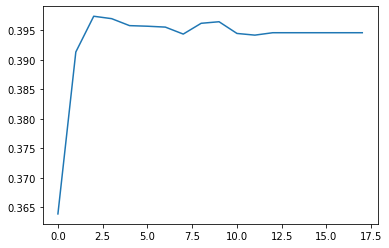

In [17]:

from sklearn.decomposition import PCA
recs = []
for i in range(2,20):
  X1 = X[:]
  pca = PCA(n_components=i)
  pca.fit(X1)
  X1 = pca.transform(X1)
  recs.append(score_classifier(X1,SVC(),labels)[1])

plt.plot(recs)


X1 = X[:]
pca = PCA(n_components=8)
pca.fit(X1)
X1 = pca.transform(X1)
X1 = MinMaxScaler().fit_transform(X1)

In [18]:
svc_clf = SVC(C=0.5, kernel='poly', gamma=1, coef0=1.0, tol=0.001, cache_size=10, max_iter=- 1, decision_function_shape='ovo', random_state=None)
score_classifier(X1,svc_clf,labels)

(array([[266., 243.],
        [153., 678.]]), 0.3945490531602798)

## Aproche 2 : combinaison des algorithmes 


In [38]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('svc', svc_clf),('sgd', sgd_clf)],voting='hard', weights=[2,1])
score_classifier(X1,voting_clf,labels)

(array([[266., 243.],
        [153., 678.]]), 0.3945490531602798)

# Save model

In [39]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(sgd_clf, file)


# Load model

In [40]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
print(pickle_model)


SGDClassifier(alpha=0.001, fit_intercept=False, loss='modified_huber',
              max_iter=100000, penalty='elasticnet')
